## Gaussian Naive Bayes

Gaussian Naive Bayes is the assumption that *data from each label is drawn from a simple Gaussian distribution*.

# Imports

In [253]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data

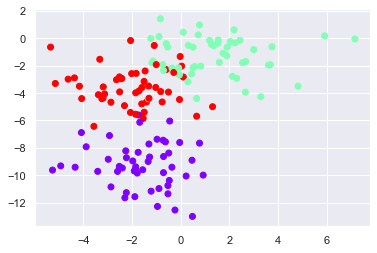

In [282]:
from sklearn.datasets import make_blobs
X, y = make_blobs(150, 2, centers = 3, random_state = 2, cluster_std = 1.5)
sns.set_style('darkgrid')
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'rainbow')

In [283]:
x_red = []
y_red = []

x_purple = []
y_purple = []

x_green = []
y_green = []

for i in range(150):
    if y[i] == 0:
        x_red.append(X[i][0])
        y_red.append(X[i][1])
    if y[i] == 1:
        x_purple.append(X[i][0])
        y_purple.append(X[i][1])
    if y[i] == 2:
        x_green.append(X[i][0])
        y_green.append(X[i][1])

One extremely fast way to create a simple model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions.
This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all you need to define such a distribution.
The result of this naive Gaussian assumption is shown in the following figure:

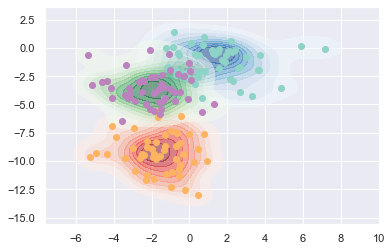

In [284]:
fig, ax = plt.subplots()

sns.kdeplot(x=x_purple, y=y_purple, shade=True, thresh=0.05, alpha=0.5, cbar=False, ax=ax, cmap='Blues')
sns.kdeplot(x=x_red, y=y_red, shade=True, thresh=0.05, alpha=0.5, cbar=False, ax=ax, cmap='Reds')
sns.kdeplot(x=x_green, y=y_green, shade=True, thresh=0.05, alpha=0.5, cbar=False, ax=ax, cmap='Greens')

ax.scatter(x_purple, y_purple, color='C0')
ax.scatter(x_red, y_red, color='C5')
ax.scatter(x_green, y_green, color='C7')

The ellipses here represent the Gaussian generative model for each label, with larger probability toward the center of the ellipses.
With this generative model in place for each class, we have a simple recipe to compute the likelihood $P({\rm features}~|~L_1)$ for any data point, and thus we can quickly compute the posterior ratio and determine which label is the most probable for a given point.

This procedure is implemented in Scikit-Learn's ``sklearn.naive_bayes.GaussianNB`` estimator:

In [285]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB()

Now let's generate some new data and predict the label:

In [286]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

Now we can plot this new data to get an idea of where the decision boundary is:

(-5.9761871388440015,
 7.781644475764174,
 -13.717382298175979,
 2.133664962968988)

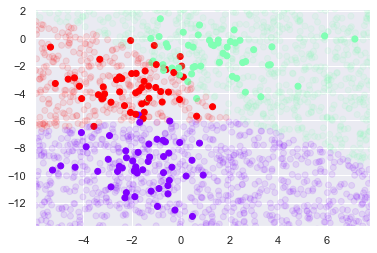

In [287]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'rainbow')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c = ynew, cmap = 'rainbow', alpha = 0.1)
plt.axis(lim)